## Interacting with Spotify's API

Spotify can be used as a data source for various data science projects. In this exercise, we will learn how to interact with the API of this social network. `Spotipy` is an open source and Python library that allows high-level use of the Spotify API.

### Step 1: Create a Spotify Developer Account
The first step is to create an application to be able to access Spotify's API services. You can find all the information [here](https://developer.spotify.com/documentation/web-api).

Once you have logged in using your Spotify account, you will be able to create the application to access the credentials needed to consume the API. You will need to fill in the following fields:

![Spotify create app](https://github.com/4GeeksAcademy/interacting-with-api-python-project-tutorial/blob/main/assets/spotify_1.PNG?raw=true)

> NOTE: As we are not going to use this API from any other web application, leave the `Redirect URI` field as `http://localhost/`.

Once you complete the form, you will have your application created. Next, in the `settings` section you can find your `Client ID` and `Client Secret`.

### Step 2: Initial configuration

- Create an app.py file inside the `./src/` folder.
- Make sure you have installed the Python library we are going to use, and if not, install it: `pip install spotipy`.

### Step 3: Environment variables

You must provide the Spotify key and token in order to use the API and access its functionality. As we saw in the previous project, you can easily do this by creating a `.env` file in the root directory of your project.

The third step is to create an `.env` file in your project and add your secret keys or passwords:

```py
CLIENT_ID="insert your client key"
CLIENT_SECRET="insert your client secret"
```

> NOTE: Be sure to add the .env inside your .gitignore file, which is not saved in source control, so that you are not putting potentially sensitive information at risk.

Now, you must install python-dotenvpackage. python-dotenvpackage is a Python package that allows your Python application to read an .env file. This package will look for an .env and, if found, expose the variables it contains to the application.

Example:

```py
from dotenv import load_dotenv
load_dotenv()

import os

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")
```

### Step 4: Initialize Spotipy library

- Import Spotipy.
- Make the connection to the API. To do this, you can use the `spotipy.Spotify()` function.

> NOTE: Use the following documentation as a guide on parameters: https://spotipy.readthedocs.io/en/2.22.1

### Step 5: Make API requests

- Start interacting with the Spotify API: Get the top 10 of your favorite artist's songs. To do this, you will have to find the `ID` of the artist to use in the library. This identifier is the web address that the artist has in Spotify:

![Spotify search for artist ID](https://github.com/4GeeksAcademy/interacting-with-api-python-project-tutorial/blob/main/assets/spotify_2.png?raw=true)

- Once you have the API response, keep the `tracks` element, which will contain the most played songs of the artist, keep the name of the song, the popularity and the duration (in minutes).

### Step 6: Transform to Pandas DataFrame

Since the result obtained in these steps is likely to be in table format, convert it to a DataFrame by importing the data in its dictionary format. Next, sort the songs by increasing popularity and display the resulting top 3.

### Step 7: Analyze statistical relationship

Does duration have a relationship with popularity? Could we say that a song that lasts a short time may be more popular than a song that lasts longer? Analyze it by plotting a `scatter plot` and argue your answer.

In [11]:
from dotenv import load_dotenv
load_dotenv()

import os

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

In [12]:
import spotipy

In [13]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [14]:
# Spotify API credentials
SPOTIPY_CLIENT_ID = client_id
SPOTIPY_CLIENT_SECRET = client_secret

# Create Spotify client credentials manager
client_credentials_manager = SpotifyClientCredentials(client_id=SPOTIPY_CLIENT_ID, client_secret=SPOTIPY_CLIENT_SECRET)

# Create Spotify object
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


In [15]:
# Search for the artist
artist_name = 'Jay-Z'  # Replace with the desired artist's name
results = sp.search(q=artist_name, type='artist')

# Get the artist's top tracks
artist_id = results['artists']['items'][0]['id']  # Get the artist ID from the search results
top_tracks = sp.artist_top_tracks(artist_id)

# Extract track details
tracks = []
for track in top_tracks['tracks']:
    track_name = track['name']
    popularity = track['popularity']
    duration_ms = track['duration_ms']  # Duration in milliseconds
    duration_min = duration_ms / 60000  # Convert duration to minutes
    tracks.append({'name': track_name, 'popularity': popularity, 'duration_min': duration_min})

# 'tracks' list now contains the most played songs of the artist with name, popularity, and duration in minutes
print(tracks)


[{'name': 'Ni**as In Paris', 'popularity': 84, 'duration_min': 3.65555}, {'name': 'Empire State Of Mind', 'popularity': 85, 'duration_min': 4.615333333333333}, {'name': 'Numb / Encore', 'popularity': 81, 'duration_min': 3.4288833333333333}, {'name': 'Run This Town', 'popularity': 81, 'duration_min': 4.458666666666667}, {'name': 'No Church In The Wild', 'popularity': 75, 'duration_min': 4.541766666666667}, {'name': 'Why I Love You', 'popularity': 74, 'duration_min': 3.35755}, {'name': '4:44', 'popularity': 74, 'duration_min': 4.74155}, {'name': 'Gotta Have It', 'popularity': 69, 'duration_min': 2.3457666666666666}, {'name': 'Otis', 'popularity': 72, 'duration_min': 2.9702166666666665}, {'name': "Big Pimpin'", 'popularity': 73, 'duration_min': 4.717766666666667}]


In [16]:
import pandas as pd

In [19]:
# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(tracks)

# Sort the DataFrame by increasing popularity
df_sorted = df.sort_values(by='popularity', ascending=True)

# Display the top 3 songs by increasing popularity
top_3_songs = df_sorted.head(10)
print(top_3_songs)

                    name  popularity  duration_min
7          Gotta Have It          69      2.345767
8                   Otis          72      2.970217
9            Big Pimpin'          73      4.717767
5         Why I Love You          74      3.357550
6                   4:44          74      4.741550
4  No Church In The Wild          75      4.541767
2          Numb / Encore          81      3.428883
3          Run This Town          81      4.458667
0        Ni**as In Paris          84      3.655550
1   Empire State Of Mind          85      4.615333


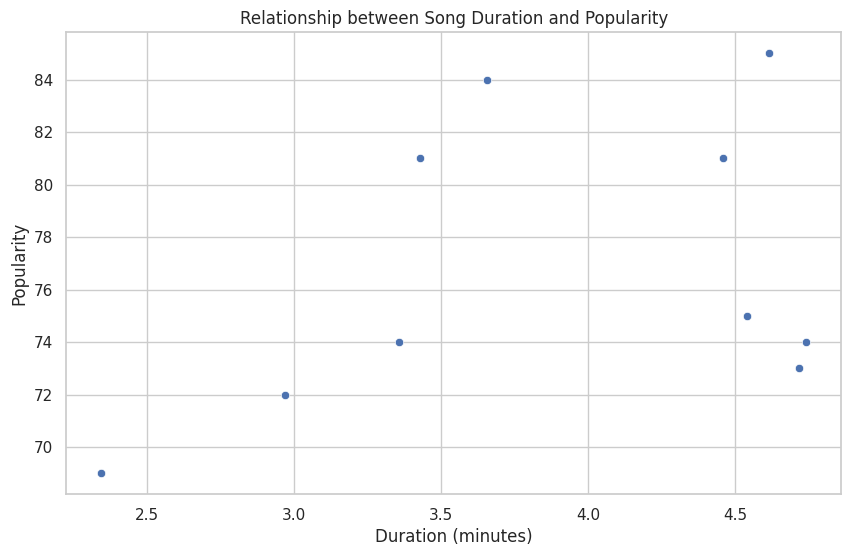

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing 'name', 'popularity', and 'duration_min' columns
# Replace this with your actual DataFrame

# Set the style of the plot
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="duration_min", y="popularity", data=df)

# Set plot labels and title
plt.xlabel("Duration (minutes)")
plt.ylabel("Popularity")
plt.title("Relationship between Song Duration and Popularity")

# Display the plot
plt.show()


For this artist, there is no linear relationship or correlation between population and duration. Songs with longer duration has a large enough range of popularity. 